<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/linear_regression_numerical_gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 1. 비용 함수 정의 (Mean Squared Error)
def compute_cost(x, y, w, b):
    # x: 입력변수
    # y: 출력변수
    # w: 웨이트
    # b: 바이어스
    y_pred = w * x + b
    cost   = np.mean((y_pred -y)**2)
    return cost

# 2. 수치 그래디언트
def numerical_gradient(f,x,y,w,b):
    h = 1e-4 #0.0001
    dw = (f(x,y,w+h,b)   - f(x,y,w,b))/h
    db = (f(x,y,w,  b+h) - f(x,y,w,b))/h
    return dw, db



Epoch=0: Cost=8.4725, w=0.2484, b=0.0728
Epoch=10: Cost=0.2464, w=0.9889, b=0.3172
Epoch=20: Cost=0.1959, w=1.0296, b=0.3664
Epoch=30: Cost=0.1833, w=1.0235, b=0.4014
Epoch=40: Cost=0.1716, w=1.0146, b=0.4344
Epoch=50: Cost=0.1607, w=1.0058, b=0.4662
Epoch=60: Cost=0.1505, w=0.9973, b=0.4970
Epoch=70: Cost=0.1410, w=0.9891, b=0.5268
Epoch=80: Cost=0.1321, w=0.9811, b=0.5555
Epoch=90: Cost=0.1238, w=0.9734, b=0.5833
Epoch=100: Cost=0.1161, w=0.9659, b=0.6102
Epoch=110: Cost=0.1088, w=0.9587, b=0.6362
Epoch=120: Cost=0.1020, w=0.9518, b=0.6613
Epoch=130: Cost=0.0957, w=0.9451, b=0.6856
Epoch=140: Cost=0.0898, w=0.9386, b=0.7091
Epoch=150: Cost=0.0843, w=0.9323, b=0.7318
Epoch=160: Cost=0.0791, w=0.9262, b=0.7537
Epoch=170: Cost=0.0743, w=0.9203, b=0.7749
Epoch=180: Cost=0.0697, w=0.9146, b=0.7954
Epoch=190: Cost=0.0655, w=0.9092, b=0.8152
Epoch=200: Cost=0.0616, w=0.9038, b=0.8344
Epoch=210: Cost=0.0579, w=0.8987, b=0.8529
Epoch=220: Cost=0.0545, w=0.8938, b=0.8708
Epoch=230: Cost=0.0512

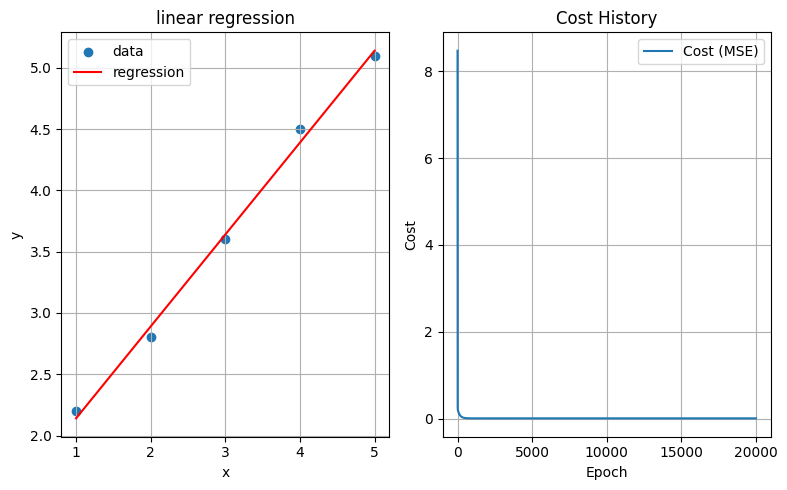

In [5]:

# 1. 데이터 준비
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

# 2. 초기 파라미터 설정
w = 0.0  # 기울기
b = 0.0  # 절편

# 하이퍼파라미터
learning_rate = 0.01
epochs = 20000

n = len(x)  # 데이터 개수


# 4. 경사하강법 학습 루프
cost_history = []

for i in range(epochs):
    y_pred = w * x + b
    error = y_pred - y

    # 기울기 계산
    # dw = (2 / n) * np.sum(error * x)
    # db = (2 / n) * np.sum(error)

    # 수치미분 계산
    dw, db = numerical_gradient(compute_cost,x,y,w,b)

    # 파라미터 업데이트
    w -=  learning_rate * dw
    b -=  learning_rate * db

    # 비용 기록
    cost = compute_cost(x, y, w, b)
    cost_history.append(cost)

    # 중간 출력
    if i % 10 == 0:
        print(f"Epoch={i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

# 5. 최종 결과 출력
print("\n최종 결과:")
print(f"w = {w:.4f}")
print(f"b = {b:.4f}")

# 6. 회귀선 시각화
y_fit = w * x + b
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.scatter(x, y, label='data')
plt.plot(x, y_fit, color='red', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression')
plt.legend()
plt.grid(True)

# 7. 비용 함수 감소 시각화
plt.subplot(1, 2, 2)
plt.plot(cost_history, label='Cost (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
